## Traffic lane detection
In this assignment, you will use image processing techniques and the Hough Transform to identify traffic lanes in a series of test images and video sequences\

There are 5 sets of images in total. Start with set 1, and then review the other sets (some are more difficult than others)

## Submission Details
Assignment deadline: Midnight, Tuesday 14th March \
Jupyter Notebook containing submission to be submitted via blackboard \
Total grade: 10% of final module mark

# Please include your name and student ID in the submitted file name!

# Submission details
### Name: Basabdatta Chaudhury
### ID: 22225649
### Class code: 2223-EE551

In [1]:
# install required libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import os
import random
%matplotlib inline

In [2]:
path = '/Users/basabdattachaudhury/Downloads/laneimages'
def load_images(set_name):
    input_path = path+ set_name
    filenames = [input_path+ filename for filename in os.listdir(input_path)]
    filenames = sorted(filenames)
    raw_images = [cv2.imread(filename) for filename in filenames]
    count = len(raw_images)
    return raw_images, count

In [3]:
def convert_to_grayscale(raw_images):
    grey_images = []
    for img in raw_images:
        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Append the grayscale image to the list
        grey_images.append(gray)
    return grey_images


In [157]:
def blur_images_gaussian(grey_images, kernel_size):
    blur_images = []
    for img in grey_images:
        # Blur the image using Gaussian blur
        blurred = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
        # Append the blurred image to the list
        blur_images.append(blurred)
    return blur_images

In [158]:
def apply_canny_edge_detection(blur_images, canny_low_threshold, canny_high_threshold):
    canny_images = []
    for img in blur_images:
        # Apply the Canny edge detector to the image
        edges = cv2.Canny(img, canny_low_threshold, canny_high_threshold)
        # Append the edge image to the list
        canny_images.append(edges)
    return canny_images

In [159]:
def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon defined by "vertices". 
    The rest of the image is set to black.
    """
    #define a blank mask
    mask = np.zeros_like(img)   
    
    #define a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [160]:
# def apply_region_of_interest(canny_images, vertices):
#     roi_images = []
#     for img in canny_images:
#         # Apply the region of interest mask to the edge image
#         roi = region_of_interest(img, vertices)
#         # Append the ROI image to the list
#         roi_images.append(roi)
#     return roi_images

In [161]:
def drawLine(img, x, y, color=[0, 255, 0], thickness=20):
    if len(x) == 0: 
        return
    
    lineParameters = np.polyfit(x, y, 1) 
    
    m = lineParameters[0]
    b = lineParameters[1]
    
    maxY = img.shape[0]
    maxX = img.shape[1]
    y1 = maxY
    x1 = int((y1 - b)/m)
    y2 = int((maxY/2)) + 60  # note: hardcoded, sets the length of the line to half the image height + 60 pixels
    x2 = int((y2 - b)/m)
    if abs(x1) < 4000 and abs(x2) < 4000:
        cv2.line(img, (x1, y1), (x2, y2), color, thickness)


# Helper function - split the detected lines into left and right lines
def draw_lines(img, lines, color=[0, 255, 0], thickness=20):

    leftPointsX = []
    leftPointsY = []
    rightPointsX = []
    rightPointsY = []

    for line in lines:
        for x1,y1,x2,y2 in line:
            m = (y1 - y2)/(x1 - x2)
            
                        
            if m < 0:
                leftPointsX.append(x1)
                leftPointsY.append(y1)
                leftPointsX.append(x2)
                leftPointsY.append(y2)
            else:
                rightPointsX.append(x1)
                rightPointsY.append(y1)
                rightPointsX.append(x2)
                rightPointsY.append(y2)

    drawLine(img, leftPointsX, leftPointsY, color, thickness)
        
    drawLine(img, rightPointsX, rightPointsY, color, thickness)



In [162]:
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = [] # insert your code here
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

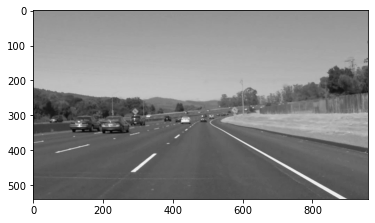

In [163]:
#FOR SET 1

raw_images,count=load_images('/set_1/')
grey_images = convert_to_grayscale(raw_images)
plt.imshow(grey_images[0], cmap='gray')
plt.show()

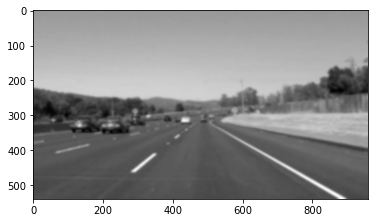

In [164]:
kernel_size = 15

blur_images = blur_images_gaussian(grey_images, kernel_size)
plt.imshow(blur_images[0], cmap='gray')
plt.show()

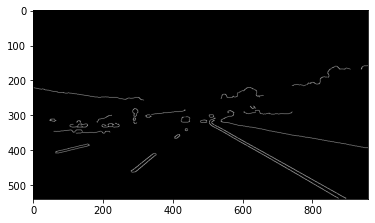

In [165]:
canny_low_threshold = 20
canny_high_threshold = 100

canny_images = apply_canny_edge_detection(blur_images, canny_low_threshold, canny_high_threshold)
plt.imshow(canny_images[0], cmap='gray')
plt.show()

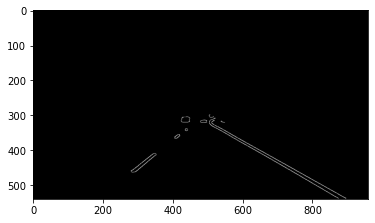

In [166]:
imshape = canny_images[4].shape  # Shape of the first edge image in the list
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
#vertices = np.array([[(0,imshape[0]),(900, 50), (500, 100), (imshape[1],imshape[0])]], dtype=np.int32)
# Create a new list of edge images with the region of interest applied
roi_images = []

for img in canny_images:
    # Apply the region of interest mask to the edge image
    roi = region_of_interest(img, vertices)
    # Append the ROI image to the list
    roi_images.append(roi)
plt.imshow(roi_images[0], cmap='gray')
plt.show()

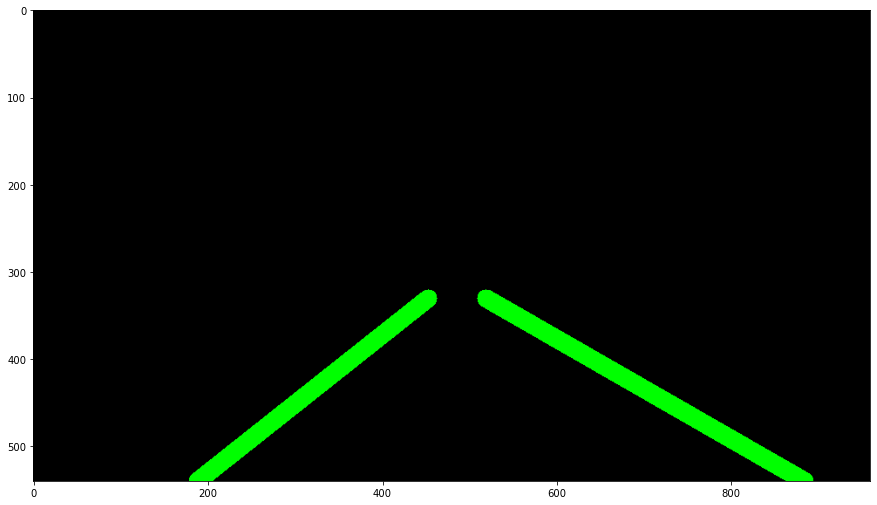

In [167]:
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 10     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 20 # minimum number of pixels making up a line
max_line_gap = 1    # maximum gap in pixels between connectable line segments

hough_images = [hough_lines(img, rho, theta, threshold, min_line_length, max_line_gap) for img in roi_images]

# display Hough line images
fig = plt.figure(figsize=(15, 15))
plt.imshow(hough_images[0], cmap='gray')
plt.show()

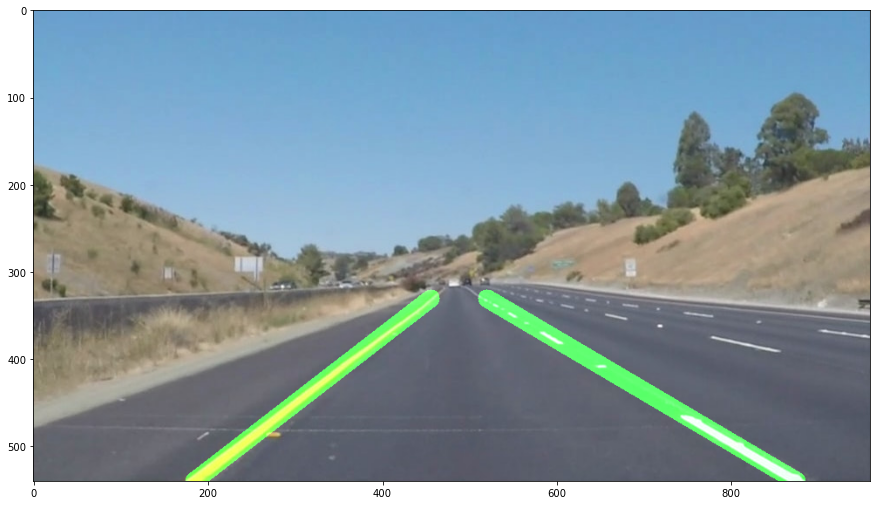

In [168]:
α=0.8
β=1.0 
λ=0.0

final_images = list()

# use the addWeighted function to overlay the Hough lines onto the original image
for i in range(len(hough_images)):
    # insert code here. Use cv2.addWeighted to merge the Hough line images to the original image
    merged_image = cv2.addWeighted(hough_images[i], α, raw_images[i], β, λ)
    final_images.append(merged_image)

#display final result
fig = plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(merged_image, cv2.COLOR_BGR2RGB))
plt.show()

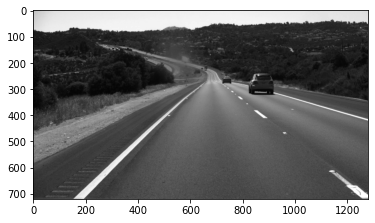

In [169]:
#for set2
raw_images,count=load_images('/set_2/')
grey_images = convert_to_grayscale(raw_images)
plt.imshow(grey_images[0], cmap='gray')
plt.show()

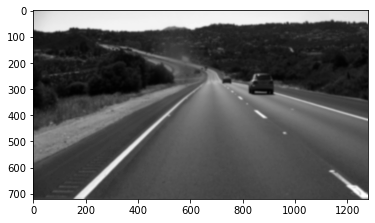

In [170]:
kernel_size = 15

blur_images = blur_images_gaussian(grey_images, kernel_size)
plt.imshow(blur_images[0], cmap='gray')
plt.show()

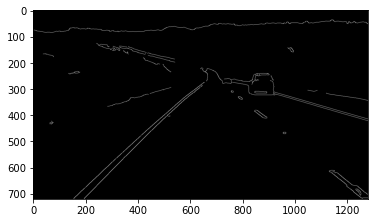

In [171]:
canny_low_threshold = 20
canny_high_threshold = 100

canny_images = apply_canny_edge_detection(blur_images, canny_low_threshold, canny_high_threshold)
plt.imshow(canny_images[0], cmap='gray')
plt.show()

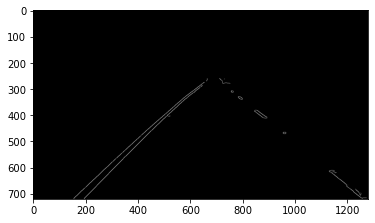

In [172]:
imshape = canny_images[4].shape  # Shape of the first edge image in the list
vertices = np.array([[(0,imshape[0]),(650, 260), (730, 260), (imshape[1],imshape[0])]], dtype=np.int32)
roi_images = []

for img in canny_images:
    # Apply the region of interest mask to the edge image
    roi = region_of_interest(img, vertices)
    # Append the ROI image to the list
    roi_images.append(roi)
plt.imshow(roi_images[0], cmap='gray')
plt.show()

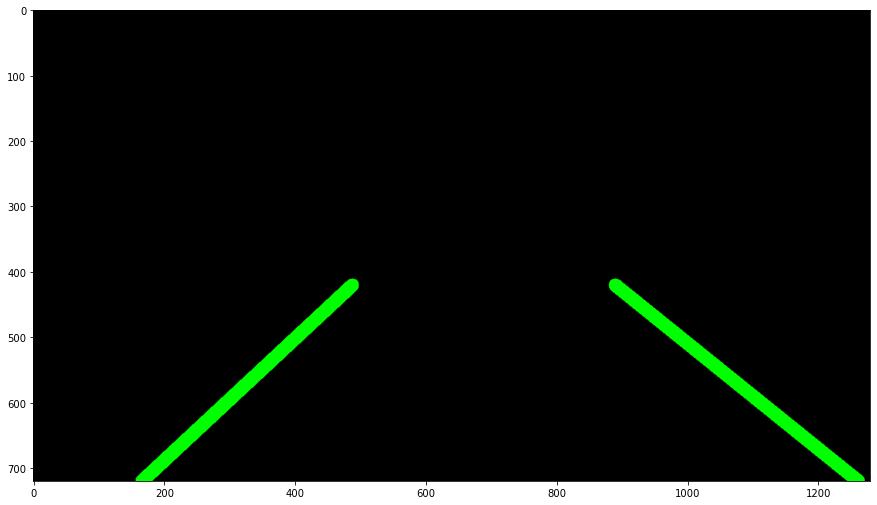

In [173]:
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 10     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 20 # minimum number of pixels making up a line
max_line_gap = 1    # maximum gap in pixels between connectable line segments

hough_images = [hough_lines(img, rho, theta, threshold, min_line_length, max_line_gap) for img in roi_images]

# display Hough line images
fig = plt.figure(figsize=(15, 15))
plt.imshow(hough_images[0], cmap='gray')
plt.show()

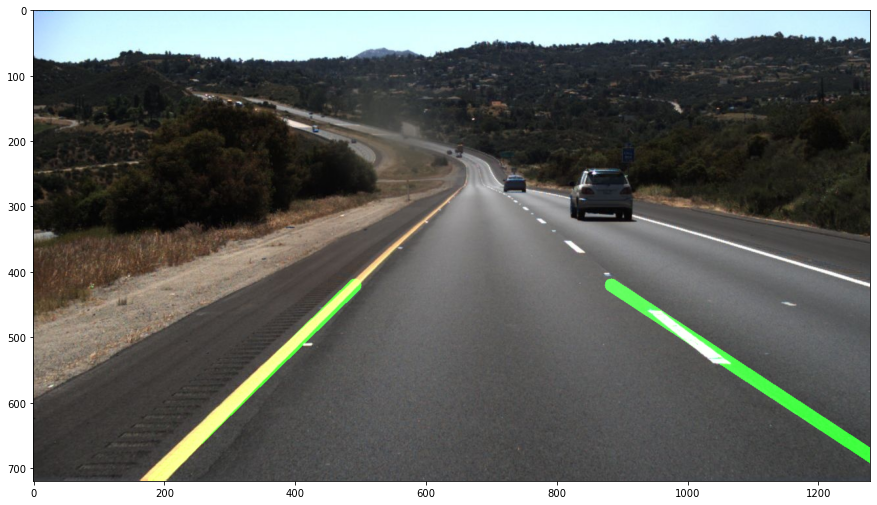

In [174]:
α=0.8
β=1.0 
λ=0.0

final_images = list()

# use the addWeighted function to overlay the Hough lines onto the original image
for i in range(len(hough_images)):
    # insert code here. Use cv2.addWeighted to merge the Hough line images to the original image
    merged_image = cv2.addWeighted(hough_images[i], α, raw_images[i], β, λ)
    final_images.append(merged_image)

#display final result
fig = plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(merged_image, cv2.COLOR_BGR2RGB))
plt.show()

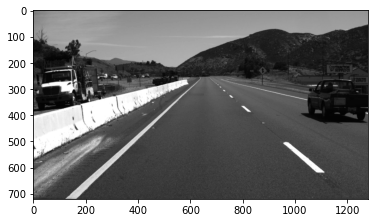

In [175]:
#for set 3
raw_images,count=load_images('/set_3/')
grey_images = convert_to_grayscale(raw_images)
plt.imshow(grey_images[0], cmap='gray')
plt.show()


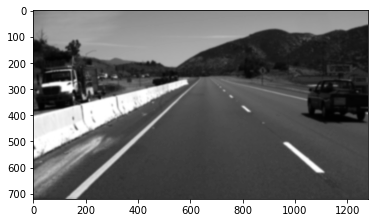

In [176]:
kernel_size = 15

blur_images = blur_images_gaussian(grey_images, kernel_size)
plt.imshow(blur_images[0], cmap='gray')
plt.show()

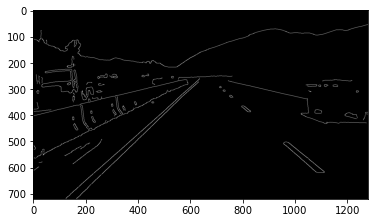

In [197]:
canny_low_threshold = 40
canny_high_threshold = 100

canny_images = apply_canny_edge_detection(blur_images, canny_low_threshold, canny_high_threshold)
plt.imshow(canny_images[0], cmap='gray')
plt.show()

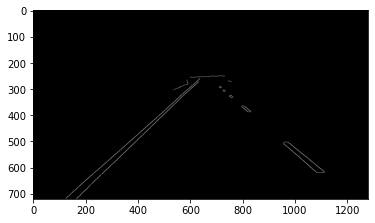

In [200]:
imshape = canny_images[4].shape  # Shape of the first edge image in the list
vertices = np.array([[(0,imshape[0]),(620, 240), (720, 240), (imshape[1],imshape[0])]], dtype=np.int32)
roi_images = []

for img in canny_images:
    # Apply the region of interest mask to the edge image
    roi = region_of_interest(img, vertices)
    # Append the ROI image to the list
    roi_images.append(roi)
plt.imshow(roi_images[0], cmap='gray')
plt.show()

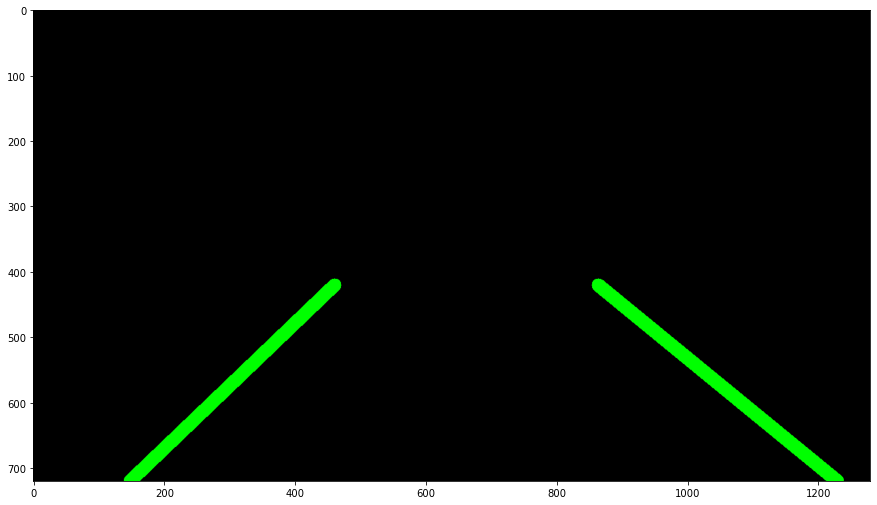

In [201]:
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 10     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 20 # minimum number of pixels making up a line
max_line_gap = 1    # maximum gap in pixels between connectable line segments

hough_images = [hough_lines(img, rho, theta, threshold, min_line_length, max_line_gap) for img in roi_images]

# display Hough line images
fig = plt.figure(figsize=(15, 15))
plt.imshow(hough_images[0], cmap='gray')
plt.show()

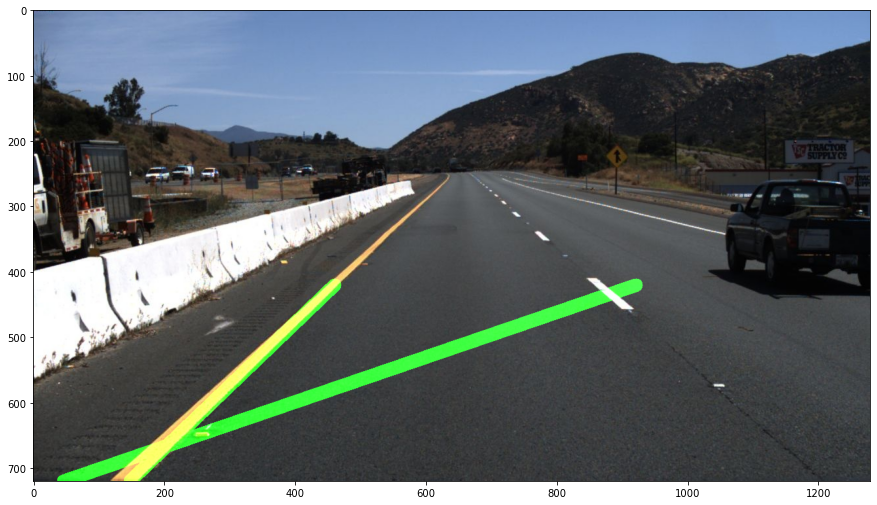

In [202]:
α=0.8
β=1.0 
λ=0.0

final_images = list()

# use the addWeighted function to overlay the Hough lines onto the original image
for i in range(len(hough_images)):
    # insert code here. Use cv2.addWeighted to merge the Hough line images to the original image
    merged_image = cv2.addWeighted(hough_images[i], α, raw_images[i], β, λ)
    final_images.append(merged_image)

#display final result
fig = plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(merged_image, cv2.COLOR_BGR2RGB))
plt.show()

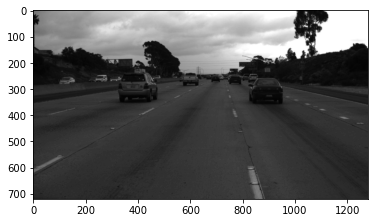

In [149]:
#for set4
raw_images,count=load_images('/set_4/')
grey_images = convert_to_grayscale(raw_images)
plt.imshow(grey_images[0], cmap='gray')
plt.show()

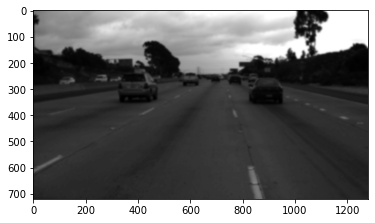

In [150]:
kernel_size = 15

blur_images = blur_images_gaussian(grey_images, kernel_size)
plt.imshow(blur_images[0], cmap='gray')
plt.show()

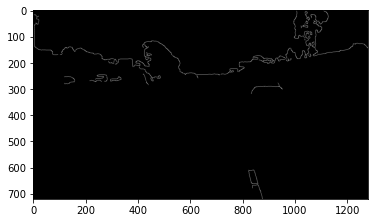

In [151]:
canny_low_threshold = 20
canny_high_threshold = 100

canny_images = apply_canny_edge_detection(blur_images, canny_low_threshold, canny_high_threshold)
plt.imshow(canny_images[0], cmap='gray')
plt.show()

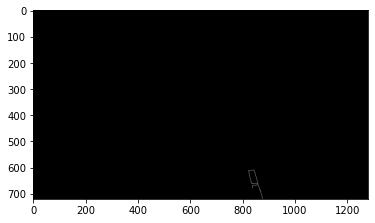

In [152]:
imshape = canny_images[4].shape  # Shape of the first edge image in the list
vertices = np.array([[(0,imshape[0]),(620, 200), (800, 200), (imshape[1],imshape[0])]], dtype=np.int32)
#vertices = np.array([[(0,imshape[0]),(900, 50), (500, 100), (imshape[1],imshape[0])]], dtype=np.int32)
# Create a new list of edge images with the region of interest applied
roi_images = []

for img in canny_images:
    # Apply the region of interest mask to the edge image
    roi = region_of_interest(img, vertices)
    # Append the ROI image to the list
    roi_images.append(roi)
plt.imshow(roi_images[0], cmap='gray')
plt.show()

In [ ]:
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 10     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 20 # minimum number of pixels making up a line
max_line_gap = 1    # maximum gap in pixels between connectable line segments

hough_images = [hough_lines(img, rho, theta, threshold, min_line_length, max_line_gap) for img in roi_images]

# display Hough line images
fig = plt.figure(figsize=(15, 15))
plt.imshow(hough_images[0], cmap='gray')
plt.show()

In [ ]:
α=0.8
β=1.0 
λ=0.0

final_images = list()

# use the addWeighted function to overlay the Hough lines onto the original image
for i in range(len(hough_images)):
    # insert code here. Use cv2.addWeighted to merge the Hough line images to the original image
    merged_image = cv2.addWeighted(hough_images[i], α, raw_images[i], β, λ)
    final_images.append(merged_image)

#display final result
fig = plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(merged_image, cv2.COLOR_BGR2RGB))
plt.show()

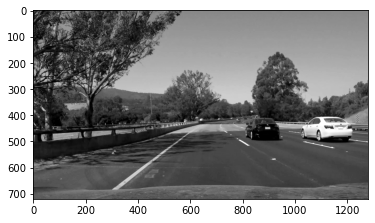

In [203]:
#for set 5
raw_images,count=load_images('/set_5/')
grey_images = convert_to_grayscale(raw_images)
plt.imshow(grey_images[0], cmap='gray')
plt.show()


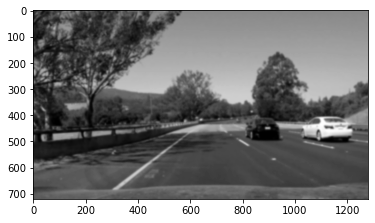

In [204]:
kernel_size = 15

blur_images = blur_images_gaussian(grey_images, kernel_size)
plt.imshow(blur_images[0], cmap='gray')
plt.show()

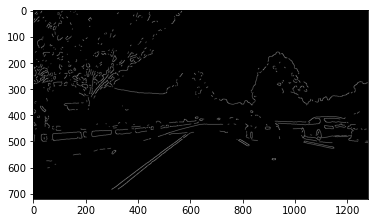

In [205]:
canny_low_threshold = 95
canny_high_threshold = 100

canny_images = apply_canny_edge_detection(blur_images, canny_low_threshold, canny_high_threshold)
plt.imshow(canny_images[0], cmap='gray')
plt.show()

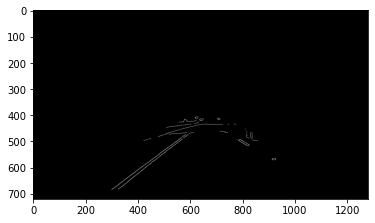

In [206]:
imshape = canny_images[4].shape  # Shape of the first edge image in the list
vertices = np.array([[(0,imshape[0]),(600, 400), (720, 400), (imshape[1],imshape[0])]], dtype=np.int32)
#vertices = np.array([[(0,imshape[0]),(900, 50), (500, 100), (imshape[1],imshape[0])]], dtype=np.int32)
# Create a new list of edge images with the region of interest applied
roi_images = []

for img in canny_images:
    # Apply the region of interest mask to the edge image
    roi = region_of_interest(img, vertices)
    # Append the ROI image to the list
    roi_images.append(roi)
plt.imshow(roi_images[0], cmap='gray')
plt.show()

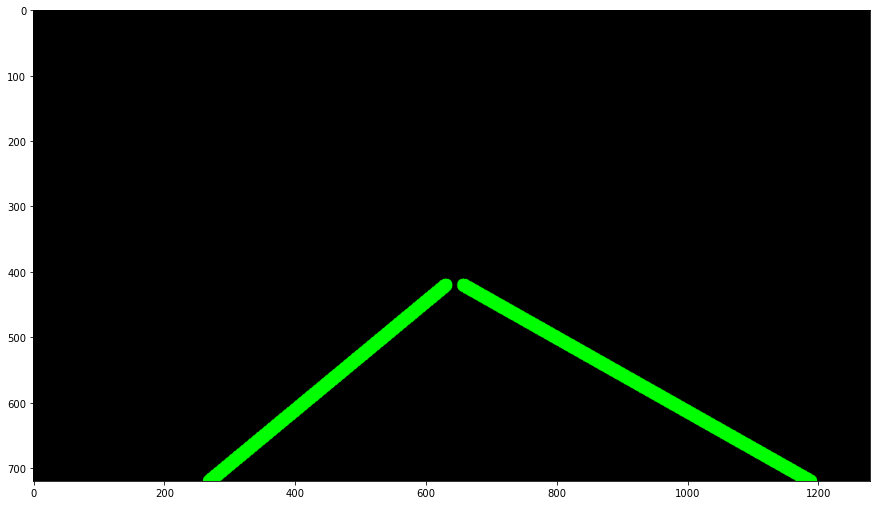

In [207]:
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 10     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 20 # minimum number of pixels making up a line
max_line_gap = 1    # maximum gap in pixels between connectable line segments

hough_images = [hough_lines(img, rho, theta, threshold, min_line_length, max_line_gap) for img in roi_images]

# display Hough line images
fig = plt.figure(figsize=(15, 15))
plt.imshow(hough_images[0], cmap='gray')
plt.show()

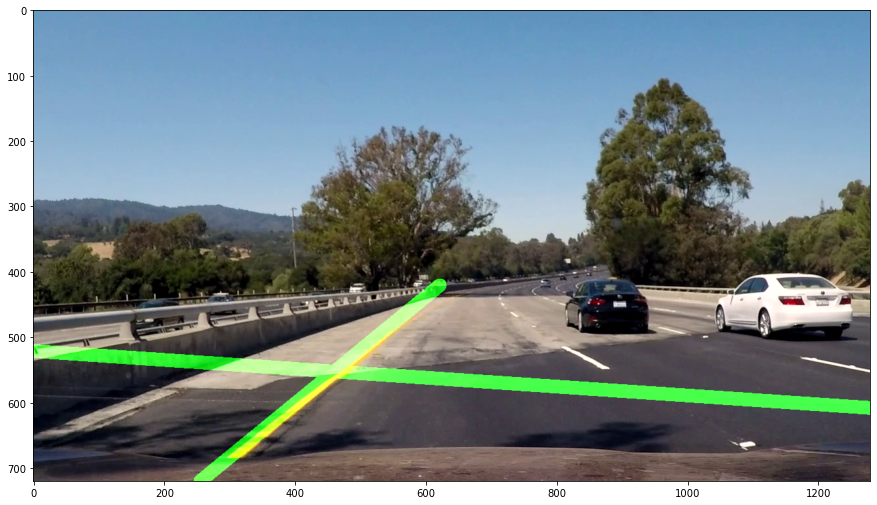

In [208]:
α=0.8
β=1.0 
λ=0.0

final_images = list()

# use the addWeighted function to overlay the Hough lines onto the original image
for i in range(len(hough_images)):
    # insert code here. Use cv2.addWeighted to merge the Hough line images to the original image
    merged_image = cv2.addWeighted(hough_images[i], α, raw_images[i], β, λ)
    final_images.append(merged_image)

#display final result
fig = plt.figure(figsize=(15, 15))
plt.imshow(cv2.cvtColor(merged_image, cv2.COLOR_BGR2RGB))
plt.show()

## Summary of findings

Comment on the performance of the line detector: 
- In what scenarios (i.e. test sets) does it work well?
- In what scenarios (i.e. test sets) does it not work? 
- Comment on why this implementation does not work in some scenarios
- vary the threshold parameters of the Canny edge detector, and comment on the impact on the lane detection performance
- vary the parameters used by the cv2.HoughLinesP function (rho, theta, threshold etc), and comment on the impact on the lane detection performance
- Suggest methods to improve the performance of this lane detector. Specifically, consider how you would make the detector more robust against changes in contrast, lighting etc

When Hough Transform is  applied to traffic lane detection in test images and video sequences, its effectiveness can depend on several factors, such as image quality, lighting conditions, road markings, and the complexity of the scene.
In scenarios where the road markings are clearly visible and well-defined, the Hough Transform can work well for detecting traffic lanes. For example, on a well-maintained highway with clear lane markings, the Hough Transform can accurately identify the lanes and their boundaries. Similarly, in scenarios where there is good lighting and minimal occlusion, the Hough Transform can perform well.
On the other hand, in scenarios where there is poor lighting or the lane markings are faded or unclear, the Hough Transform may not work well. For example, on a poorly-maintained road with faded lane markings, the Hough Transform may fail to detect the lanes accurately. Similarly, in scenarios where there is heavy traffic or occlusion, such as in urban areas with multiple vehicles in close proximity, the Hough Transform may not be as effective.
Overall, the performance of the Hough Transform for traffic lane detection can depend on several factors, and its effectiveness may vary depending on the specific scenario and test set.



I tried different Threshold values for each set. For set 1 and Set2 I was able to find the optimal Threshold Values and for Set 3,4,5 I was not able to find the Correct Threshold values.

There are several methods that can be used to improve the performance of a lane detector, and make it more robust against changes in contrast, lighting, and other environmental factors. Some of these methods are:

1.Contrast enhancement: One way to improve the robustness of a lane detector against changes in contrast is to preprocess the images using contrast enhancement techniques. This can help to improve the visibility of lane markings and make them easier to detect.

2.Adaptive thresholding: Instead of using a fixed threshold value for binarization of the image, adaptive thresholding techniques can be used to set different threshold values for different regions of the image, based on local contrast and lighting conditions.

3.Color space transformation: Changing the color space of the image can help to improve the robustness of a lane detector against changes in lighting. For example, using the HSV or LAB color space can help to separate the brightness and color information, making it easier to detect lane markings.

4.Multiple image scales: Using multiple image scales can help to detect lane markings at different levels of detail. This can improve the robustness of the detector against changes in image resolution or lane marking size.

5.Temporal filtering: For video sequences, temporal filtering can be used to improve the robustness of the detector against changes in lighting or other environmental factors. This involves smoothing the lane detections over time to remove noise and outliers.